In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import seaborn as sns
import random

In [2]:
training_data = pd.DataFrame(data={"x":np.random.normal(loc=65,scale=5,size=1000)})

In [3]:
training_data

,x
0,64.069538
1,68.499925
2,67.533734
3,69.441603
4,62.135776
...,...
995,60.275676
996,64.668942
997,56.292779
998,73.113135


(array([  3.,   7.,  18.,  28.,  43.,  69.,  84., 112., 144., 114., 119.,
         85.,  60.,  57.,  29.,  17.,   6.,   3.,   1.,   1.]),
 array([50.60682531, 52.20801696, 53.80920862, 55.41040027, 57.01159193,
        58.61278358, 60.21397523, 61.81516689, 63.41635854, 65.0175502 ,
        66.61874185, 68.2199335 , 69.82112516, 71.42231681, 73.02350846,
        74.62470012, 76.22589177, 77.82708343, 79.42827508, 81.02946673,
        82.63065839]),
 <BarContainer object of 20 artists>)

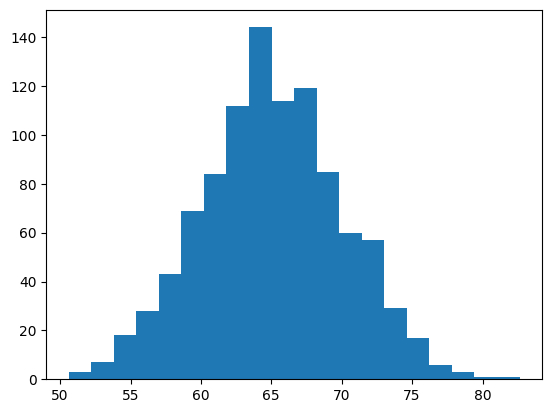

In [4]:
plt.hist(training_data, bins=20)

In [5]:
mu_values = np.linspace(63, 67, 200)
sigma_values = np.linspace(4, 6, 200)
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)

In [6]:
nll_values = np.zeros_like(mu_grid)

In [7]:
def gaussian_nll(mu,sigma):

    log_pdf = s.norm.logpdf(training_data,mu,sigma)
    return -np.mean(log_pdf)

In [8]:
for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        nll_values[i, j] = gaussian_nll(mu_grid[i, j], sigma_grid[i, j])

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(mu_grid, sigma_grid, nll_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('Mean (mu)')
ax.set_ylabel('Standard Deviation (sigma)')
ax.set_zlabel('Negative Log Likelihood (NLL)')
ax.set_title('3D Plot of Negative Log Likelihood Function (Convex Surface)')

# Adjusting the view angle to better visualize the convexity
ax.view_init(elev=45, azim=225)

plt.show()

In [ ]:
def del_by_del_gaussian_nll(mu_initial,sigma_initial):

    del_by_del_mu = -np.mean(training_data - mu_initial)/sigma_initial**2
    del_by_del_sigma = (1/sigma_initial) - np.mean(training_data - mu_initial)**2/sigma_initial**3

    return [del_by_del_mu,del_by_del_sigma]

In [ ]:
epsilon = 10**(-2)
epoch_counter = 0
mu_initial = 5
sigma_initial = 1
tol = 10**(-6)

while True:

    initial_gradients = del_by_del_gaussian_nll(mu_initial,sigma_initial)

    mu_final = mu_initial - (epsilon * initial_gradients[0])
    sigma_final = sigma_initial - (epsilon * initial_gradients[1])

    nll_initial_value = gaussian_nll(mu_initial,sigma_initial)
    nll_final_value = gaussian_nll(mu_final,sigma_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1

    mu_initial = mu_final
    sigma_initial = sigma_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

In [ ]:
mu_final

In [ ]:
sigma_final

In [ ]:
sns.distplot(a=training_data["x"],bins=10,fit=s.norm,kde=False)

In [ ]:
def del_by_del_rayleigh_nll(sigma_initial):

    del_by_del_sigma = -np.mean((-2)/sigma_initial + training_data**2/sigma_initial**3)

    return del_by_del_sigma

In [ ]:
def rayleigh_nll(sigma):

    log_pdf = -np.mean(s.rayleigh.logpdf(training_data,sigma))

    return log_pdf

In [ ]:
epsilon = 10**(-2)
epoch_counter = 0
sigma_initial = 1
tol = 10**(-6)

while True:

    initial_gradients = del_by_del_rayleigh_nll(sigma_initial)

    sigma_final = sigma_initial - (epsilon * initial_gradients)

    nll_initial_value = rayleigh_nll(sigma_initial)
    nll_final_value = rayleigh_nll(sigma_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1
    sigma_initial = sigma_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

In [4]:
training_data = pd.DataFrame(data={"x":np.random.binomial(n=1,p=0.65,size=1000)})

In [5]:
training_data

,x
0,1
1,1
2,1
3,0
4,0
...,...
995,1
996,1
997,1
998,0


In [6]:
def bernoulli_nll(p):

    log_pdf = s.bernoulli.logpmf(training_data,p)

    return -np.mean(log_pdf)

In [10]:
def del_by_del_bernoulli_nll(initial_p):

    del_by_del_p = np.mean((initial_p - training_data)/(initial_p * (1 - initial_p)))

    return del_by_del_p

In [11]:
epsilon = 10**(-2)
epoch_counter = 0
p_initial = random.uniform(0.00000000001,1)
tol = 10**(-6)

while True:

    initial_gradients = del_by_del_bernoulli_nll(p_initial)

    p_final = p_initial - (epsilon * initial_gradients)

    nll_initial_value = bernoulli_nll(p_initial)
    nll_final_value = bernoulli_nll(p_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1
    p_initial = p_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 0.7008771201536718
Epoch # 2, NLL Value = 0.6978559997574756
Epoch # 3, NLL Value = 0.6950745026174107
Epoch # 4, NLL Value = 0.6925122604172628
Epoch # 5, NLL Value = 0.6901509159474027
Epoch # 6, NLL Value = 0.6879738765063923
Epoch # 7, NLL Value = 0.6859661046987167
Epoch # 8, NLL Value = 0.6841139399623621
Epoch # 9, NLL Value = 0.682404945501768
Epoch # 10, NLL Value = 0.6808277763444175
Epoch # 11, NLL Value = 0.6793720650559235
Epoch # 12, NLL Value = 0.6780283222926385
Epoch # 13, NLL Value = 0.6767878498824194
Epoch # 14, NLL Value = 0.6756426645331066
Epoch # 15, NLL Value = 0.6745854305971015
Epoch # 16, NLL Value = 0.6736094005863167
Epoch # 17, NLL Value = 0.6727083623479314
Epoch # 18, NLL Value = 0.6718765919879693
Epoch # 19, NLL Value = 0.6711088117746438
Epoch # 20, NLL Value = 0.6704001523728972
Epoch # 21, NLL Value = 0.6697461188604402
Epoch # 22, NLL Value = 0.6691425600577658
Epoch # 23, NLL Value = 0.6685856407731223
Epoch # 24, NLL Value

In [12]:
p_final

np.float64(0.6217424947604702)